In [1]:
import pybryt
from lecture import pybryt_reference

In [2]:
import sys
!{sys.executable} -m pip install --upgrade pybryt

Defaulting to user installation because normal site-packages is not writeable


# Introduction to Python

# Lecture 3

## Learning objectives

At the end of this lecture, you will be able to:

* Plot 2D graphs.
* Read data from files.
* Catch run-time errors and handle them gracefully rather than letting the program simply fail.

## Plotting curves - the basics

If you have programmed in Python before, or when you start looking at coding examples online, you will notice a few different modules that you can import to enable you to accomplish more or less the same objective. The three most common are [matplotlib](https://matplotlib.org/index.html), [pyplot](https://matplotlib.org/api/pyplot_api.html), and pylab. We will leave it to you to read the [official documentation to see how these three are related](https://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related). For this lecture series, we will be importing `matplotlib.pyplot` as `plt` so that it is always clear from where each function call is coming.

Let us start with a simple example by plotting the function $$y = t^2e^{-t^2}.$$

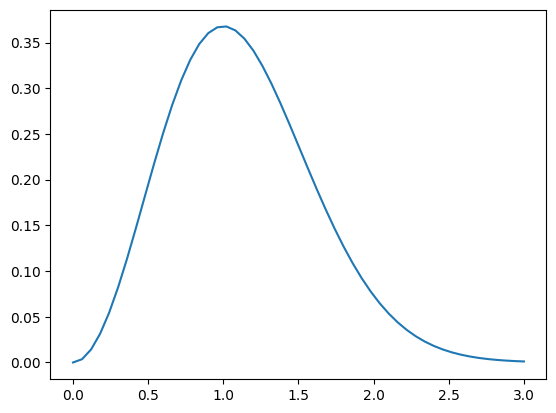

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 3, 51)
y = t**2 * np.exp(-t**2)
plt.plot(t, y)
plt.show()

Plots also should have *labels* on the axis, a *title*, and sometimes a specific extent of the axis (perhaps you wish to easily compare two graphs side-by-side):

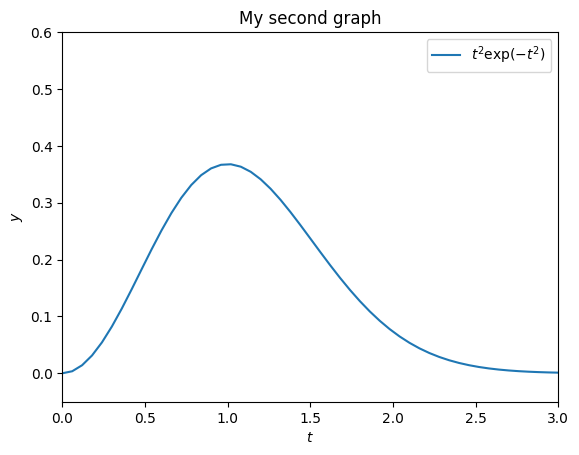

In [3]:
def f(t):
    return t**2 * np.exp(-t**2)


t = np.linspace(0, 3, 51)  # Generates 51 points between 0 and 3.
y = f(t)
plt.plot(t, y, label=r"$t^2\exp(-t^2)$")  # For added awesomeness you can use LaTeX syntax.

# Add a legend to our plot.
plt.legend()

# Label the axes.
plt.xlabel(r"$t$")
plt.ylabel(r"$y$")

# Specify the extent of the axes [tmin, tmax, ymin, ymax].
plt.axis([0, 3, -0.05, 0.6])

# Set the plot title.
plt.title("My second graph")

plt.show()

## Exercise 3.1: Plot a formula

> NOTE: We have found that automated assessment is too unreliable for assessing plots. For feedback on the plots compare with your peers or ask one of the TAs to give you feedback.

Make a plot of the function $$y(t) = v_0t − {1\over2}gt^2$$ for $v_0 = 10 \,\text{ms}^{-1}$, $g = 9.81 \,\text{ms}^{-2}$, and $t \in [0, 2v_0/g]$. The label on the $x$ axis should be 'time (s)' and the label on the $y$ axis should be 'height (m)'.

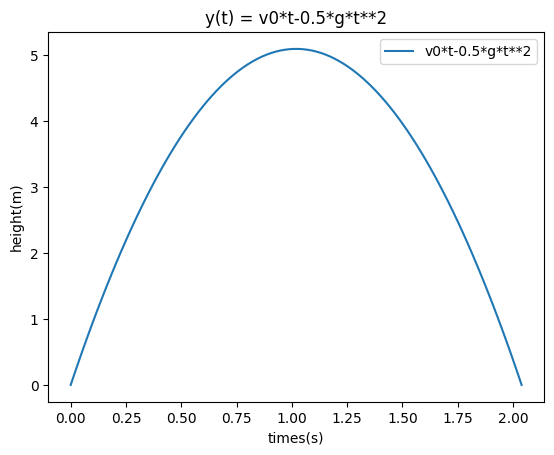

In [11]:
# Write your code here.
import numpy as np
import matplotlib.pyplot as plt
v0 = 10
g = 9.81
t_max = 2*v0/g
t = np.linspace(0,t_max,100)
y = v0*t-0.5*g*t**2
plt.plot(t,y,label="v0*t-0.5*g*t**2")
plt.xlabel('times(s)')
plt.ylabel('height(m)')
plt.title('y(t) = v0*t-0.5*g*t**2')
plt.legend()
plt.show()



## Exercise 3.2: Plot another formula

The function

$$f(x, t) = e^{-(x - 3t)^2}\sin(3\pi(x - t))$$

describes, for a fixed value of $t$, a wave localised in space. Write a program that visualises this function as a function of $x$ on the interval $[−4, 4]$ when $t = 0$.

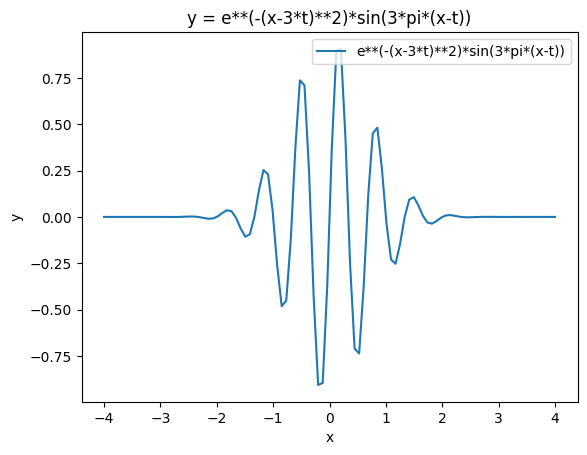

In [19]:
# Write your code here.
import numpy as np
import matplotlib.pyplot as plt
t = 0
x_min = -4
x_max = 4
x = np.linspace(x_min,x_max,100)
y = np.e**(-(x-3*t)**2)*np.sin(3*np.pi*(x-t))
plt.plot(x,y,label= 'e**(-(x-3*t)**2)*sin(3*pi*(x-t))')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = e**(-(x-3*t)**2)*sin(3*pi*(x-t))')
plt.legend()
plt.show()


## Multiple curves in the same plot

We can also plot several curves in one plot:

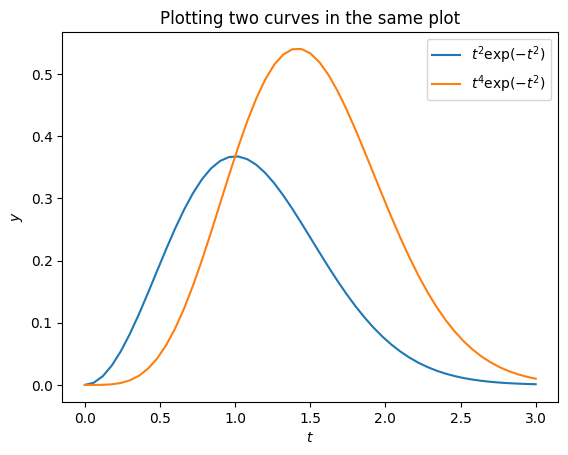

In [20]:
def f1(t):
    return t**2 * np.exp(-t**2)


def f2(t):
    return t**2 * f1(t)


t = np.linspace(0, 3, 51)
y1 = f1(t)
y2 = f2(t)

plt.plot(t, y1, label=r"$t^2\exp(-t^2)$")
plt.plot(t, y2, label=r"$t^4\exp(-t^2)$")
plt.legend(loc="best")  # uses labels we defined previously
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.title("Plotting two curves in the same plot")

plt.show()

When plotting multiple curves in the same plot, PyLab usually does a good job of making sure that the different lines look different. However, sometimes you need to take action yourself (e.g. if you need to print your graph out in black&white). To do this, we can add an extra argument to the plot command, where we specify what we want - e.g. `r-` means a *red solid line*, while `bo` means *blue circles*:

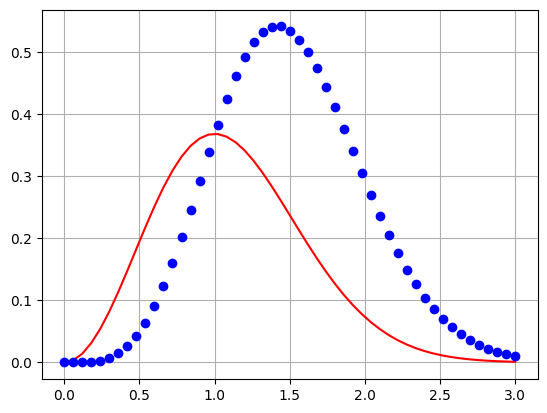

In [21]:
plt.plot(t, y1, "r-")
plt.plot(t, y2, "bo")
plt.grid()  # we can also add a grid to our plot
plt.show()

For further examples check out the [matplotlib](https://matplotlib.org/) documentation.

## Exercise 3.3: Plot a formula for several parameters

Write a program in which you generate 10 uniformly spaced values for $v_0$ range from 1 to 20, and plot the function $y(t) = v_0t − \frac{1}{2}gt^2$ within the time range $t \in [0, 2v_0/g]$. Assume $g = 9.81 \,\text{ms}^{-2}$.

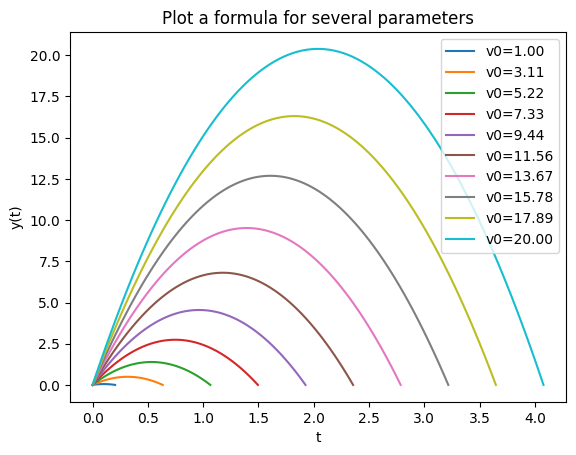

In [23]:
# Write your code here.
import numpy as np
import matplotlib.pyplot as plt

g = 9.81
v0_values =  np.linspace(1,20,10)

for v0 in  v0_values:
  t_max = 2*v0/g
  t = np.linspace(0,t_max,100)
  y = v0*t-0.5*g*t**2
  plt.plot(t,y,label=f'v0={v0:.2f}')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Plot a formula for several parameters')
plt.legend()
plt.show()

## Handling errors gracefully

We expect you have seen plenty of run-time errors. When an error occurs, an `Exception` is *raised*. These exceptions tend to be very specific, and it is worth familiarizing yourself with them by reading the [relevant section](https://docs.python.org/3/library/exceptions.html#concrete-exceptions) from Python's documentation.

Let us take a look at an example of an out of bounds reference - this raises an exception called an `IndexError`.

```python 
places_to_visit = ("Pompeii",
                   "Fernanda de Noronha",
                   "Dolomites",
                   "Bourbon Street")
print(places_to_visit[4])

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
<ipython-input-6-6a516db87396> in <module>()
      1 places_to_visit = ("Pompeii", "Fernanda de Noronha", "Dolomites", "Bourbon Street")
      2 option = 4 # lets assume that the user has given the input option 4
----> 3 print(places_to_visit[option])

IndexError: tuple index out of range
```

Here we have an `IndexError` (i.e. a reference out-of-bounds) with the clarification that it is the **tuple index out of range**.

The general way we deal with this issue in Python (and in many other programming languages) is to try to do what we indend to, and if it fails, we recover from the error. This is implemented using the `try`-`except` block:
```python
try:
    <statements we indend to do>
except:
    <statements for handling errors>
```

If something goes wrong in the `try` block, Python raises an **exception**, and the execution jumps immediately to the `except` block. If you use an `except` by itself as above, then it will catch all exceptions raised, but this is generally considered bad practice as it can hide errors that you might not have anticipated - the last thing we want is to hide a bug!

Let us try an example:

In [24]:
def get_location(index):
    places_to_visit = ("Pompeii",
                       "Fernanda de Noronha",
                       "Dolomites",
                       "Bourbon Street")

    try:
        return places_to_visit[index]
    except TypeError:
        raise TypeError("The index should be an integer.")
    except IndexError:
        raise IndexError("Values must be between 0-3.")


print("Test case 1: ", get_location(1))

Test case 1:  Fernanda de Noronha


If we pass 4 as an argument, an `IndexError` is raised.

```python
print("Test case 2: ", get_location(4))

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
<ipython-input-9-9d82aff2337b> in get_location(index)
      7     try:
----> 8         return places_to_visit[index]
      9     except TypeError:

IndexError: tuple index out of range

During handling of the above exception, another exception occurred:

IndexError                                Traceback (most recent call last)
<ipython-input-10-baa17f0505ab> in <module>()
      1 # If we pass in 4 as an argument, an *IndexError* ia raised.
----> 2 print("Test case 2: ", get_location(4))

<ipython-input-9-9d82aff2337b> in get_location(index)
     10         raise TypeError("The index should be an integer.")
     11     except IndexError:
---> 12         raise IndexError("Values must be between 0-3.")
     13 
     14     return None

IndexError: Values must be between 0-3.
```

In the above example the expected input is an integer. If the user types a string, *e.g.*, `"four"`, then a `TypeError` is raised, and the approperiate `except`-block is executed.

```python
print("Test case 3: ", get_location("four"))

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-9-9d82aff2337b> in get_location(index)
      7     try:
----> 8         return places_to_visit[index]
      9     except TypeError:

TypeError: tuple indices must be integers or slices, not str

During handling of the above exception, another exception occurred:

TypeError                                 Traceback (most recent call last)
<ipython-input-10-a8af82536957> in <module>()
      2 # If the user types a string, e.g. "four", then a **TypeError** is raised,
      3 # and the approperiate except block is executed.
----> 4 print("Test case 3: ", get_location("four"))

<ipython-input-9-9d82aff2337b> in get_location(index)
      8         return places_to_visit[index]
      9     except TypeError:
---> 10         raise TypeError("The index should be an integer.")
     11     except IndexError:
     12         raise IndexError("Values must be between 0-3.")

TypeError: The index should be an integer.
```

This is still not perfect. What happens if you enter -1?

In [25]:
print("Test case 4: ", get_location(-1))

Test case 4:  Bourbon Street


Recall that negative indices traverse the list from the end to the beginning. We can deal with this issue more elegantly/robustly if we **raise** our own error:

In [26]:
def get_location(index):
    places_to_visit = ("Pompeii",
                       "Fernanda de Noronha",
                       "Dolomites",
                       "Bourbon Street")

    try:
        if not 0 <= index < len(places_to_visit):
            raise IndexError

        return places_to_visit[index]
    except TypeError:
        raise TypeError("The index should be an integer.")
    except IndexError:
        raise IndexError("Values must be between 0-3.")

```python
print("Test case 5: ", get_location(-1))

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
<ipython-input-11-d29b7f03e343> in get_location(index)
      8         if not 0 <= index < len(places_to_visit):
----> 9             raise IndexError
     10 

IndexError: 

During handling of the above exception, another exception occurred:

IndexError                                Traceback (most recent call last)
<ipython-input-11-d29b7f03e343> in <module>()
     17     return None
     18 
---> 19 print("Test case 5: ", get_location(-1))

<ipython-input-11-d29b7f03e343> in get_location(index)
     13         raise TypeError("The index should be an integer.")
     14     except IndexError:
---> 15         raise IndexError("Values must be between 0-3.")
     16 
     17     return None

IndexError: Values must be between 0-3.
```

## Exercise 3.4: Test more in the program

Consider the equation of motion in Exercise 3.1.

* Implement this as a Python function - call the function `displacement` and specify two positional arguments $t$ and $v_0$ and one keyword argument $g = 9.81\,\text{ms}^{-2}$.
* The function should raise a `ValueError` if either $t$ or $v_0$ are negative.

In [3]:
# Uncomment and modify the code below. Do not change variable names for testing purposes.

def displacement(t, v0, g=9.81):
    try:
        if t < 0 or v0 < 0:
           raise ValueError
        return v0 * t - 0.5 * g * t ** 2
    except ValueError:
           raise ValueError("t or v0 can not be negative")
       

In [4]:
import lecture
with lecture.pybryt.check(lecture.pybryt_reference(3, 4)):
    displacement(t=1.6, v0=101.4)

REFERENCE: exercise-3_4
SATISFIED: True
MESSAGES:
  - SUCCESS: Your function computes displacement correctly.


In [5]:
import pytest
import numbers

assert displacement(t=0, v0=0, g=0) == 0
assert displacement(t=1, v0=1, g=1) == 0.5

with pytest.raises(ValueError):
    displacement(t=-5, v0=0, g=0)

### BEGIN HIDDEN TESTS
with pytest.raises(ValueError):
    displacement(t=-10, v0=10, g=10)

with pytest.raises(ValueError):
    displacement(t=10, v0=-10, g=10)

assert isinstance(displacement(t=0, v0=0, g=0), numbers.Real)
assert callable(displacement)
### END HIDDEN TESTS

## Exercise 3.5: Implement the factorial function with exception handling

The factorial of $n$, written as $n!$, is defined as

$$n! = n(n − 1)(n − 2) \cdot \ldots \cdot 2 \cdot 1,$$

with the special cases

$$1! = 1,$$ $$0! = 1.$$

For example, $4! = 4 \cdot 3 \cdot 2 \cdot 1 = 24$, and $2! = 2 \cdot 1 = 2$.

Implement your own factorial function to calculate $n!$ and name it `my_factorial`. Return $1$ immediately if $n$ is $1$ or $0$, otherwise use a loop to compute $n!$. You can use Python's own [math.factorial(x)](https://docs.python.org/3/library/math.html) to check your code.

If negative $n$ is passed, `ValueError` should be raised.

In [6]:
# Uncomment and complete this code - keep the names the same for testing purposes.

def my_factorial(x):
    if x < 0:
        raise ValueError("Input must be a non - negative integer")
    elif x == 0 or x == 1:
        return 1
    result = 1
    for i in range(2, x + 1):
        result *= i
    return result

In [7]:
import lecture
with lecture.pybryt.check(lecture.pybryt_reference(3, 5)):
    my_factorial(10)

REFERENCE: exercise-3_5
SATISFIED: True
MESSAGES:
  - SUCCESS: Great! You are multiplying values correctly.
  - SUCCESS: Your loop iterates over the correct values.
  - SUCCESS: Your function computes factorial correctly. Well done!


In [8]:
import pytest
import numbers

assert my_factorial(0) == 1
assert my_factorial(1) == 1
assert my_factorial(2) == 2
assert my_factorial(5) == 120

with pytest.raises(ValueError):
    my_factorial(-5)

### BEGIN HIDDEN TESTS
assert isinstance(my_factorial(5), numbers.Real)
assert callable(my_factorial)
### END HIDDEN TESTS

## Exercise 3.6: Wave speed

The longitudinal wave velocity in a material is given by the equation:

$$V_p = \sqrt{\frac{k+4\mu/3}{\rho}},$$

where $V_p$ is the longitudinal wave velocity, $k$ is the bulk modulus, $\mu$ is the shear modulus, and $\rho$ is the density. The shear wave velocity $V_s$ is given by the equation:
$$V_s = \sqrt{\frac{\mu}{\rho}}.$$

1. Write a function that takes as arguments $k$, $\mu$ and $\rho$, and returns $V_p$ and $V_s$.
2. Ensure your function raises a `ValueError` if any of the input arguments have a non-physical value (i.e. it cannot have negative density).

| Material               | Shear modulus (GPa) | Bulk modulus (GPa) | Density (kg/m^3)|
|------------------------|---------------------|--------------------|-----------------|
|Quartz                  | 44                  | 38                 | 2650            | 
|Clay                    | 6.85                | 20.9               | 2580            |
|Water                   | 0                   | 2.29               | 1000            |

**HINT**: Notice that $k$ and $\mu$ are in GPa and that the unit conversion is required.

In [9]:
# Uncomment and complete this code - keep the names the same for testing purposes.
import numpy as np
def calc_material_velocity(mu, k, rho):
     if rho < 0 or k < 0 or mu < 0:
         raise ValueError('Input arguments (k,mu,rho) cannot be negative')
     mu_pa = mu * 1e9
     k_pa = k * 1e9
     vp = np.sqrt((k_pa + 4 * mu_pa / 3)/rho)
     vs = np.sqrt(mu_pa / rho)
     return vp, vs

materials = {
    "Quartz":{'mu':44,'k':38,'rho':2650},
    "Clay":{'mu':6.85,'k':20.9,'rho':2580},
    "Water":{'mu':0,'k':2.29,'rho':1000}
}

for material, props in materials.items():
    try:
        mu_value = props["mu"]    
        k_value = props["k"]     
        rho_value = props["rho"]
        vp, vs = calc_material_velocity(mu_value, k_value, rho_value)
        print(f"{material}:")
        print(f"  Longitudinal wave velocity (Vp): {vp:.2f} m/s")
        print(f"  Shear wave velocity (Vs): {vs:.2f} m/s")
    except ValueError as e:
        print(f"{material}: {e}")

Quartz:
  Longitudinal wave velocity (Vp): 6039.70 m/s
  Shear wave velocity (Vs): 4074.77 m/s
Clay:
  Longitudinal wave velocity (Vp): 3411.87 m/s
  Shear wave velocity (Vs): 1629.43 m/s
Water:
  Longitudinal wave velocity (Vp): 1513.27 m/s
  Shear wave velocity (Vs): 0.00 m/s


In [10]:
with pybryt.check(pybryt_reference(3, 6)):
    calc_material_velocity(1.4e9, 2.4e9, 3.6e3)

REFERENCE: exercise-3_6
SATISFIED: True
MESSAGES:
  - SUCCESS: Your calculation of the longitudinal wave velocity is correct. Well done!
  - SUCCESS: Great! Your calculation of the shear wave velocity is correct.
  - SUCCESS: Your final solution is correct. Well done!


In [11]:
import pytest
import numbers
import numpy as np

assert np.allclose(calc_material_velocity(0, 1e-9, 1), (1, 0))
assert len(calc_material_velocity(0, 1e-9, 1)) == 2
assert np.allclose(calc_material_velocity(1e-9, 1e-9, 1), (np.sqrt(1 + 4/3), 1))

with pytest.raises(ValueError):
    calc_material_velocity(-5, 5, 5)

### BEGIN HIDDEN TESTS
with pytest.raises(ValueError):
    calc_material_velocity(5, -5, 5)
with pytest.raises(ValueError):
    calc_material_velocity(5, 5, -5)

assert isinstance(calc_material_velocity(0, 1e-9, 1), tuple)
assert all([isinstance(i, numbers.Real) for i in calc_material_velocity(5, 5, 5)])
assert callable(calc_material_velocity)
### END HIDDEN TESTS

## Reading data from a plain text file

We can read text from a [text file](http://en.wikipedia.org/wiki/Text_file) into strings in a program. This is a common (and simple) way for a program to get input data. The basic recipe is:
```python
# Open text file
with open("myfile.txt", "r") as infile: # "r" specifies that we are opening the file for reading

    # Read first line:
    line = infile.readline()

    # Read the lines in a loop one by one:
    for line in infile:
        <process line>

    # Load all remaining lines into a list of strings:
    lines = infile.readlines()
    
for line in lines:
    <process line>
```

Let us look at the file [`./data/data1.txt`](./data/data1.txt) (all of the data files in this lecture are stored in the sub-folder `data/` of this notebook directory). The file has a column of numbers:

```
21.8
18.1
19
23
26
17.8
```

The goal is to read this file and calculate the mean:

In [12]:
# Initialise values
s = 0
n = 0

# Open data file
with open("data/data1.txt", "r") as infile:

    # Loop to compute sum
    for number in infile:
        number = float(number)  # convert string to float
        s += number
        n += 1

# Calculate the mean.
mean = s/n

print(mean)

20.95


Let us make this example more interesting. There is a **lot** of data out there for you to discover all kinds of interesting facts - you just need to be interested in learning a little analysis. For this case we have downloaded tidal gauge data for the port of Avonmouth from the [BODC](http://www.bodc.ac.uk/). Take some time now to open the file and have a look through it - [data/2012AVO.txt](data/2012AVO.txt) you will see the [metadata](http://en.wikipedia.org/wiki/Metadata):
```
Port:              P060  
Site:              Avonmouth  
Latitude:          51.51089  
Longitude:         -2.71497  
Start Date:        01JAN2012-00.00.00  
End Date:          30APR2012-23.45.00  
Contributor:       National Oceanography Centre, Liverpool  
Datum information: The data refer to Admiralty Chart Datum (ACD)  
Parameter code:    ASLVTD02 = Surface elevation (unspecified datum) of the water body by fixed in-situ pressure sensor
```

Let us read the column ASLVTD02 (the surface elevation) and plot it:

In [ ]:
import pendulum
import numpy as np
import matplotlib.pyplot as plt

# Initialise an empty list to store the elevation
elevation = []
time = []

with open("data/2012AVO.txt", "r") as tide_file:
    for line in tide_file:
        # Here we use a try/except block to try to read the data and
        # raise an exception if we fail to parse the data in a line
        # for some reason. This is a neat trick to skip over all the
        # header information.
        try:
            # Split this line into words.
            words = line.split()

            # If we do not have 5 words then the line must be part of the header.
            if len(words) != 5:
                raise ValueError

            # The elevation data is in the 4th column. However, the BODC
            # appends a "M" when a value is improbable and an "N" when
            # data is missing (maybe a ship dumped into it during rough weather!)
            # As we are in a try/except block, an error will be raised
            # in the float conversion when this situation arises.
            level = float(words[3])
            elevation.append(level)

            # Form a single string with the date and time.
            date_time = " ".join(words[1:3])

            # Dealing with dates and time is a major pain as there are
            # several different formats. Luckily there are lots of people
            # out there writting libraries that are making your life easier.
            # At the moment the Python library *pendulum* seems to be the
            # best out there for parsing various different date and time
            # formats and is pretty easy to use.
            date_time = pendulum.parse(date_time)

            # So that we can plot this we are going to convert this date
            # and time into a POSIX timestamp (aka UNIX Epoch time):
            # https://en.wikipedia.org/wiki/Unix_time
            time.append(date_time.timestamp())
        except ValueError:
            pass

# For plotting lets convert the list to a NumPy array.
elevation = np.array(elevation)
time = np.array(time)

plt.plot(time, elevation)
plt.xlabel("timestamp")
plt.ylabel("Elevation (meters)")
plt.show()

You will notice in the above example that we used the `split()` string member function. This is a very useful function for grabbing individual words on a line. When called without any arguments it assumes that the [delimiter](http://en.wikipedia.org/wiki/Delimiter) is a blank space. However, you can use this to split a string with any delimiter, e.g. `line.split(";")` or `line.split(":")`.

## Exercise 3.7: Read a two-column data file

The file [data/xy.dat](./data/xy.dat) contains two columns of numbers, corresponding to $x$ and $y$ coordinates on a curve. The start of the file looks like this:
```
-1.0000   -0.0000  
-0.9933   -0.0087  
-0.9867   -0.0179  
-0.9800   -0.0274  
-0.9733   -0.0374
```
Make a program that reads the first column into a list `xlist` and the second column into a list `ylist`. Then convert the lists to arrays named `xarray` and `yarray`. Store the maximum and minimum y coordinates in two variables named `ymin` and `ymax`.

**Hint**: Read the file line by line, split each line into words, convert to float, and append to `xlist` and `ylist`.

In [13]:
# Write your code here.
import numpy as np
xlist = []
ylist = []
with open('data/xy.dat','r') as file:
    for line in file:
        parts = line.split()
        x = float(parts[0])
        y = float(parts[1])
        xlist.append(x)
        ylist.append(y)
xarray = np.array(xlist)
yarray = np.array(ylist)
ymin = np.min(yarray)
ymax = np.max(yarray)
print(ymin)
print(ymax)

-0.9482
0.9482


In [14]:
import lecture
with lecture.pybryt.check(lecture.pybryt_reference(3, 7)):
    xlist, ylist, xarray, yarray, ymin, ymax

REFERENCE: exercise-3_7
SATISFIED: True
MESSAGES:
  - SUCCESS: Your xlist is correct. Well done!
  - SUCCESS: Your ylist is correct. Well done!
  - SUCCESS: You converted the list into xarray successfully. Well done!
  - SUCCESS: Great! You converted the list into yarray successfully.
  - SUCCESS: Wow! You computed ymin correctly.
  - SUCCESS: You computed ymax correctly. Amazing!


In [15]:
import numbers
import numpy as np

assert np.isclose(xlist[0], -1)
assert np.isclose(ylist[-1], 0)

assert len(xlist) == len(ylist) == 301

assert np.isclose(xarray[0], -1)
assert np.isclose(yarray[-1], 0)

assert np.isclose(ymin, -0.9482)
assert np.isclose(ymax, 0.9482)

### BEGIN HIDDEN TESTS
assert np.isclose(xlist[-1], 1)
assert np.isclose(ylist[0], 0)
assert np.isclose(xarray[-1], 1)
assert np.isclose(yarray[0], 0)

assert xarray.shape == yarray.shape == (301,)

assert all(isinstance(i, list) for i in [xlist, ylist])
assert all(isinstance(i, np.ndarray) for i in [xarray, yarray])
assert all(isinstance(i, numbers.Real) for i in [ymin, ymax])
### END HIDDEN TESTS

## Exercise 3.8: Read a data file

The files [data/density_water.dat](./data/density_water.dat) and [data/density_air.dat](./data/density_water.dat) contain data about the density of water and air (respectively) for different temperatures. The data files have some comment lines starting with `#`, and some lines are blank. The rest of the lines contain density data: the temperature in the first column and the corresponding density in the second column. This exercise aims to read the data in such a file, discard commented or blank lines, and plot the density versus the temperature as distinct (small) circles for each data point. Write a function `readTempDenFile` that takes a filename as an argument and returns two lists containing the temperature and the density. Call this function on both files, and store the temperature and density in lists called `temp_air_list`, `dens_air_list`, `temp_water_list` and `dens_water_list`.

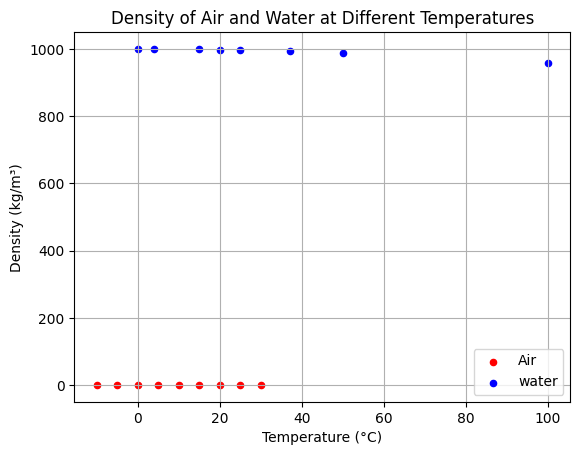

In [16]:
# Uncomment and modify the following code. Do not change variable names for testing purposes.
import matplotlib.pyplot as plt
def readTempDenFile(filename):
    temp_list = []
    density_list = []

    with open(filename,'r') as infile:
       line_num = 0
       for line in infile:
         line_num += 1
         line_stripped = line.strip()

         if not line_stripped or line_stripped.startswith('#'):
             continue

         data_parts = line_stripped.split()
         if len(data_parts) != 2:
             raise ValueError(f'Data format error in line{line_num}')
        
         temp = float(data_parts[0])
         density = float(data_parts[1])
         temp_list.append(temp)
         density_list.append(density)
    return temp_list,density_list

if __name__ == '__main__':
     air_file_path = 'data/density_air.dat'
     water_file_path = 'data/density_water.dat'

     temp_air_list,dens_air_list = readTempDenFile(air_file_path)
     temp_water_list,dens_water_list = readTempDenFile(water_file_path)
    
     plt.figure()
     plt.scatter(
     x = temp_air_list,
     y = dens_air_list,
     s = 20,
     color = 'red',
     label = 'Air'
    )
     plt.scatter(
     x = temp_water_list,
     y = dens_water_list,
     s = 20,
     color = 'blue',
     label = 'water'
    )

plt.xlabel('Temperature (°C)')  
plt.ylabel('Density (kg/m³)')   
plt.title('Density of Air and Water at Different Temperatures')  
plt.legend(loc='best')  
plt.grid(True) 
        


In [17]:
with pybryt.check(pybryt_reference(3, 8)):
    readTempDenFile("data/density_air.dat")

REFERENCE: exercise-3_8
SATISFIED: True
MESSAGES:
  - SUCCESS: You are extracting correct temperature values.
  - SUCCESS: You are extracting correct density values.
  - SUCCESS: Great! You are iterating through the file line by line.
  - SUCCESS: Amazing! Your function returns correct data.


In [18]:
import numbers
import numpy as np

assert isinstance(readTempDenFile("data/density_air.dat"), tuple)
assert len(readTempDenFile("data/density_air.dat")) == 2

assert isinstance(readTempDenFile("data/density_water.dat"), tuple)
assert len(readTempDenFile("data/density_water.dat")) == 2

assert np.isclose(temp_air_list[0], -10)
assert np.isclose(dens_air_list[0], 1.341)
assert np.isclose(dens_water_list[-1], 958.3665)

assert len(temp_air_list) == len(dens_air_list) == 9

### BEGIN HIDDEN TESTS
assert all(isinstance(i, list) for i in readTempDenFile("data/density_air.dat"))
assert all(isinstance(i, list) for i in readTempDenFile("data/density_water.dat"))

assert isinstance(temp_air_list, list)
assert isinstance(dens_air_list, list)
assert isinstance(temp_water_list, list)
assert isinstance(dens_water_list, list)

assert all(isinstance(i, numbers.Real) for i in temp_air_list)
assert all(isinstance(i, numbers.Real) for i in dens_air_list)

assert np.isclose(temp_air_list[-1], 30)
assert np.isclose(temp_water_list[0], 0)
assert np.isclose(temp_water_list[-1], 100)

assert all(isinstance(i, numbers.Real) for i in temp_water_list)
assert all(isinstance(i, numbers.Real) for i in dens_water_list)

assert callable(readTempDenFile)
### END HIDDEN TESTS

## Exercise 3.9: Read acceleration data and find velocities

A file [data/acc.dat](./data/acc.dat) contains measurements $a_0, a_1, \ldots, a_{n-1}$ of the acceleration of an object moving along a straight line. The measurement $a_k$ is taken at time point $t_k = k \Delta t$, where $\Delta t$ is the time spacing between the measurements. The exercise aims to load the acceleration data into a program and compute the velocity $v(t)$ of the object at some time $t$.

In general, the acceleration $a(t)$ is related to the velocity $v(t)$ through $v^\prime(t) = a(t)$. This means that

$$v(t) = v(0) + \int_0^t{a(\tau)d\tau}.$$

If $a(t)$ is only known at some discrete, equally spaced points in time, $a_0, \ldots, a_{n-1}$ (which is the case in this exercise), we must compute the integral above numerically, for example, using the Trapezoidal rule:

$$v(t_k) \approx v(0) + \Delta t \left(\frac{1}{2}a_0 + \frac{1}{2}a_k + \sum_{i=1}^{k-1}a_i \right), \ \ 1 \leq k \leq n-1. $$

We assume $v(0) = 0$, so $v_0 = 0$. Read the values $a_0, \ldots, a_{n-1}$ from file into an array `acc_array` and plot the acceleration versus time for $\Delta t = 0.5$. The time should be stored in an array named `time_array`.

Then write a function `compute_velocity(dt, k, a)` that takes as arguments a time interval $\Delta t$ as `dt`, an index `k`, and a list of accelerations `a`. The function uses the Trapezoidal rule to compute one $v(t_k)$ value and return this value. Experiment with different values of $\Delta t$ and $k$.

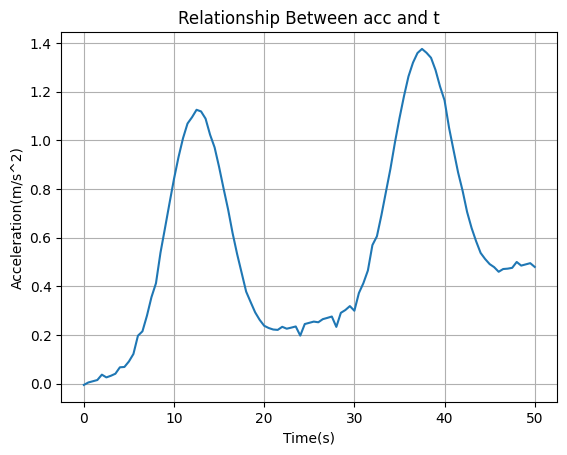

result v1 = 0.038778045247040004
result v2 = 0.31101938606329205
result v2 = 0.017994334407147


In [8]:
# Uncomment and modify the following code. Do not change variable names for testing purposes.
import numpy as np
import matplotlib.pyplot as plt

def read_acc_data(filename):
    acc_array = []
    with open(filename,'r') as infile:
     for line in infile:
        if line.strip():
         acc_array.append(float(line.strip()))
    acc_array = np.array(acc_array)
    return acc_array
def plot_acceleration(acc_array,dt):
    time_array = np.arange(len(acc_array)) * dt
    plt.figure()
    plt.plot(time_array,acc_array)
    plt.xlabel('Time(s)')
    plt.ylabel('Acceleration(m/s^2)')
    plt.title('Relationship Between acc and t')
    plt.grid()
    plt.show()
    return time_array

def compute_velocity(dt,k,a):
   v0 = 0
   integral_part = dt * ( 0.5 * a[0] + 0.5 * a [k] + np.sum(a[1:k]))
   return v0 + integral_part
    
if __name__ == "__main__":
    data_file =  'data/acc.dat'
    acc_array = read_acc_data(data_file)
    time_array = plot_acceleration(acc_data, dt=0.5)
    #test
    test_dt1 = 0.5
    test_k1 = 5
    result1 = compute_velocity(dt=test_dt1,k=test_k1,a=acc_data)
    print(f'result v1 = {result1}')

    test_dt2 = 0.9
    test_k2 = 10
    result2 = compute_velocity(dt=test_dt2,k=test_k2,a=acc_data)
    print(f'result v2 = {result2}')

    test_dt3 = 1.2
    test_k2 = 3
    result2 = compute_velocity(dt=test_dt2,k=test_k2,a=acc_data)
    print(f'result v2 = {result2}')



In [9]:
import lecture
with lecture.pybryt.check(lecture.pybryt_reference(3, 9)):
    compute_velocity(1, 2, [5, 10, 12, 15, 16]), acc_array, time_array

REFERENCE: exercise-3_9
SATISFIED: True
MESSAGES:
  - SUCCESS: Great! Array acc_array is correct.
  - SUCCESS: Well done! Array time_array is correct.
  - SUCCESS: Function compute_velocity returns the correct result.


In [ ]:
import numbers
import numpy as np

assert compute_velocity(1, 3, [1, 1, 1, 1]) == 3

assert isinstance(acc_array, np.ndarray)
assert isinstance(time_array, np.ndarray)

assert time_array.shape == acc_array.shape == (101,)

assert np.isclose(time_array[0], 0)
assert np.isclose(acc_array[0], -0.00506375204384)

### BEGIN HIDDEN TESTS
assert compute_velocity(1, 3, [0, 0, 0, 0]) == 0

assert callable(compute_velocity)

assert np.isclose(time_array[-1], 50)
assert np.isclose(acc_array[-1], 0.479565276825)

assert all([isinstance(i, numbers.Real) for i in time_array])
assert all([isinstance(i, numbers.Real) for i in acc_array])
### END HIDDEN TESTS

## File writing

Writing a file in Python is simple. First, we open the file in writing mode:
```python
with open(filename, "w") as fout:
```
After that, we just collect the text we want to write in one or more strings, and, for each string, use a statement along the lines of

```python
fout.write(string)
```

The write function does not add a newline character so you may have to do that explicitly:

```python
fout.write(string + "\n")
```

That’s it! Compose the strings and write! Let's do an example. Write a nested list (table) to a file:

In [10]:
# Let's define some table of data
data = [[0.75, 0.29619813, -0.29619813, -0.75],
        [0.29619813, 0.11697778, -0.11697778, -0.29619813],
        [-0.29619813, -0.11697778, 0.11697778, 0.29619813],
        [-0.75, -0.29619813, 0.29619813, 0.75]]

# Open the file for writing. Notice the "w" indicates we are writing!
with open("tmp_table.dat", "w") as outfile:
    for row in data:
        for column in row:
            outfile.write("%14.8f" % column)
        outfile.write("\n")   # ensure newline